# Starbucks - Linear Learner

    Udacity - Machine Learning Engineer Nanodegree Program
    Author: Leonardo Simões
    
**Here the Linear Learner algorithm will be used to perform a multilabel classification of the type of offer. The dataset used will only be 'offers'. At the end of the process, the accuracy of the model will be calculated.**

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import boto3
import sagemaker
import matplotlib.pyplot as plt
from sagemaker import LinearLearner

## Configuring AWS SageMaker

In [2]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [3]:
# should be the name of directory you created to save your features data
data_dir = 'data'

# set prefix, a descriptive name for a directory  
prefix = 'data'

# upload all data to S3
input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
input_data

's3://sagemaker-sa-east-1-377572488885/data'

In [4]:
output_path = 's3://{}/{}'.format(bucket, prefix)
output_path

's3://sagemaker-sa-east-1-377572488885/data'

## Train and test data

In [5]:
# confirm that data is in S3 bucket
empty_check = []
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    empty_check.append(obj.key)
    print(obj.key)

assert len(empty_check) !=0, 'S3 bucket is empty.'
print('Test passed!')

data/X_test.csv
data/X_train.csv
data/linear-learner-2020-10-21-14-45-06-011/output/model.tar.gz
data/offers.csv
data/offers_ml.csv
data/portfolio.json
data/profile.json
data/transactions.csv
data/transcript.json
data/y_test.csv
data/y_train.csv
sagemaker-record-sets/LinearLearner-2020-10-21-14-37-53-792/.amazon.manifest
sagemaker-record-sets/LinearLearner-2020-10-21-14-37-53-792/matrix_0.pbr
sagemaker-record-sets/LinearLearner-2020-10-21-14-44-53-183/.amazon.manifest
sagemaker-record-sets/LinearLearner-2020-10-21-14-44-53-183/matrix_0.pbr
Test passed!


In [6]:
x_train_path = output_path + '/X_train.csv'
x_train = pd.read_csv(x_train_path, names=None, dtype='float32')
x_train.head()

,reward,difficulty,duration,mobile,social,web
0,3.0,7.0,7.0,1.0,1.0,1.0
1,0.0,0.0,4.0,1.0,0.0,1.0
2,2.0,10.0,10.0,1.0,1.0,1.0
3,5.0,5.0,5.0,1.0,1.0,1.0
4,2.0,10.0,7.0,1.0,0.0,1.0


In [7]:
train_x_np = x_train.iloc[:,:].to_numpy()
train_x_np

array([[ 3.,  7.,  7.,  1.,  1.,  1.],
       [ 0.,  0.,  4.,  1.,  0.,  1.],
       [ 2., 10., 10.,  1.,  1.,  1.],
       ...,
       [ 3.,  7.,  7.,  1.,  1.,  1.],
       [ 0.,  0.,  3.,  1.,  1.,  0.],
       [ 3.,  7.,  7.,  1.,  1.,  1.]], dtype=float32)

In [8]:
y_train_path = output_path + '/y_train.csv'
y_train = pd.read_csv(y_train_path, names=None, dtype='float32')
y_train.head()

,offer_label
0,2.0
1,0.0
2,2.0
3,1.0
4,2.0


In [9]:
train_y_np = y_train.iloc[:,0].to_numpy()
train_y_np

array([2., 0., 2., ..., 2., 0., 2.], dtype=float32)

In [10]:
x_test_path = output_path + '/X_test.csv'
x_test = pd.read_csv(x_test_path, names=None, dtype='float32')
x_test.head()

,reward,difficulty,duration,mobile,social,web
0,5.0,5.0,5.0,1.0,1.0,1.0
1,10.0,10.0,5.0,1.0,1.0,1.0
2,5.0,5.0,5.0,1.0,1.0,1.0
3,5.0,5.0,5.0,1.0,1.0,1.0
4,0.0,0.0,3.0,1.0,1.0,0.0


In [11]:
test_x_np = x_test.to_numpy()
test_x_np

array([[ 5.,  5.,  5.,  1.,  1.,  1.],
       [10., 10.,  5.,  1.,  1.,  1.],
       [ 5.,  5.,  5.,  1.,  1.,  1.],
       ...,
       [ 3.,  7.,  7.,  1.,  1.,  1.],
       [10., 10.,  7.,  1.,  1.,  0.],
       [10., 10.,  7.,  1.,  1.,  0.]], dtype=float32)

In [12]:
y_test_path = output_path + '/y_test.csv'
y_test = pd.read_csv(y_test_path, names=None, dtype='float32')
y_test.head()

,offer_label
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0


In [13]:
test_y_np = y_test.iloc[:,0].to_numpy()
test_y_np

array([1., 1., 1., ..., 2., 1., 1.], dtype=float32)

## Linear Learner

In [14]:
linear = LinearLearner(role = role,
                      train_instance_count = 1,
                      train_instance_type='ml.c4.xlarge',
                      predictor_type='multiclass_classifier',
                      num_classes=3,
                      output_path=output_path,
                      sagemaker_session=sagemaker_session,
                      epochs = 15)

In [15]:
formatted_train_data = linear.record_set(train_x_np, labels=train_y_np)

In [16]:
%%time
linear.fit(formatted_train_data);

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-10-21 16:29:33 Starting - Starting the training job...
2020-10-21 16:29:36 Starting - Launching requested ML instances......
2020-10-21 16:30:57 Starting - Preparing the instances for training.........
2020-10-21 16:32:25 Downloading - Downloading input data
2020-10-21 16:32:25 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/21/2020 16:32:42 INFO 139767343175488] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'in


2020-10-21 16:32:39 Training - Training image download completed. Training in progress.[2020-10-21 16:32:54.842] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 11, "duration": 2278, "num_examples": 112, "num_bytes": 7569964}
#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.09379722196561796, "sum": 0.09379722196561796, "min": 0.09379722196561796}}, "EndTime": 1603297974.84256, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1603297974.842486}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.01699311216887053, "sum": 0.01699311216887053, "min": 0.01699311216887053}}, "EndTime": 1603297974.842683, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1603297974.842664}

#metrics {"Metrics": {"train_multiclass_cross_entropy

[2020-10-21 16:33:04.108] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 19, "duration": 2300, "num_examples": 112, "num_bytes": 7569964}
#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.09243490882392402, "sum": 0.09243490882392402, "min": 0.09243490882392402}}, "EndTime": 1603297984.108541, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1603297984.10847}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.012841261227925619, "sum": 0.012841261227925619, "min": 0.012841261227925619}}, "EndTime": 1603297984.108631, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1603297984.108616}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.14458314225480362, "sum": 0.14458314225480362, "mi

[2020-10-21 16:33:11.043] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 25, "duration": 2321, "num_examples": 112, "num_bytes": 7569964}
#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.09220630886318447, "sum": 0.09220630886318447, "min": 0.09220630886318447}}, "EndTime": 1603297991.044084, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1603297991.044002}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.01210607977171202, "sum": 0.01210607977171202, "min": 0.01210607977171202}}, "EndTime": 1603297991.044189, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1603297991.044167}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.14459289275848114, "sum": 0.14459289275848114, "mi


2020-10-21 16:33:28 Uploading - Uploading generated training model
2020-10-21 16:33:28 Completed - Training job completed
Training seconds: 74
Billable seconds: 74
CPU times: user 603 ms, sys: 30.8 ms, total: 634 ms
Wall time: 4min 12s


In [17]:
%%time
# deploy your model to create a predictor
predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-------------------!CPU times: user 342 ms, sys: 12.9 ms, total: 355 ms
Wall time: 9min 32s


In [18]:
test_preds = predictor.predict(test_x_np)

In [19]:
test_y_preds = np.array([x.label['predicted_label'].float32_tensor.values[0] for x in test_preds])
test_y_preds

array([1., 1., 1., ..., 2., 1., 1.])

In [20]:
# test that your model generates the correct number of labels
assert len(test_y_preds)==len(test_y_np), 'Unexpected number of predictions.'
print('Test passed!')

Test passed!


## Model evaluation

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y_np, test_y_preds, normalize=True)
print(accuracy)

print('\nPredicted class labels: ')
print(test_y_preds)
print('\nTrue class labels: ')
print(test_y_np)

1.0

Predicted class labels: 
[1. 1. 1. ... 2. 1. 1.]

True class labels: 
[1. 1. 1. ... 2. 1. 1.]


In [22]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(test_y_np, test_y_preds)
print(matriz_confusao)

[[ 5621     0     0]
 [    0 16045     0]
 [    0     0 15442]]


In [23]:
pip install mlxtend  

     |████████████████████████████████| 1.3 MB 12.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


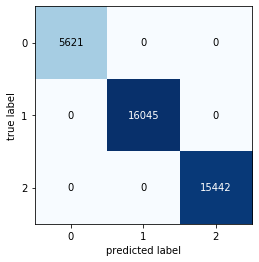

In [24]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

## Delete endpoint and empty bucket

In [44]:
#delete endpoint
predictor.delete_endpoint()

In [ ]:
# deleting bucket
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()